In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/sentimentalreview_IBMpro.tsv",delimiter='\t',quoting=3)
print("Read Successful")

Read Successful


In [3]:
df.head() #displays first 5 elements

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.tail() #displays last 5 elements

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.shape  #displays dimentions

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [9]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [10]:
df['length']=df['Review'].apply(len)

In [11]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [12]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

# **Data Prepocessing**

---



In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [16]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [17]:
df['tokenized_Review']=df['Review'].apply(text_process)

In [18]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


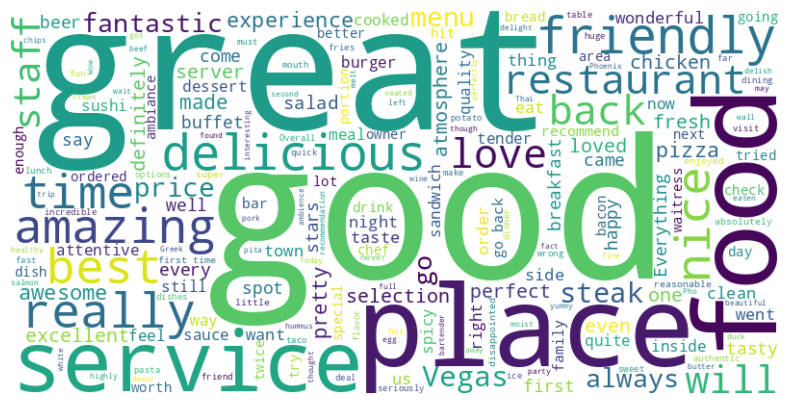

In [19]:
word_cloud =df.loc[df['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
#generate a wordcloud object
wordcloud =WordCloud(width=800 ,height =400 ,background_color='white').generate(text)
#display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

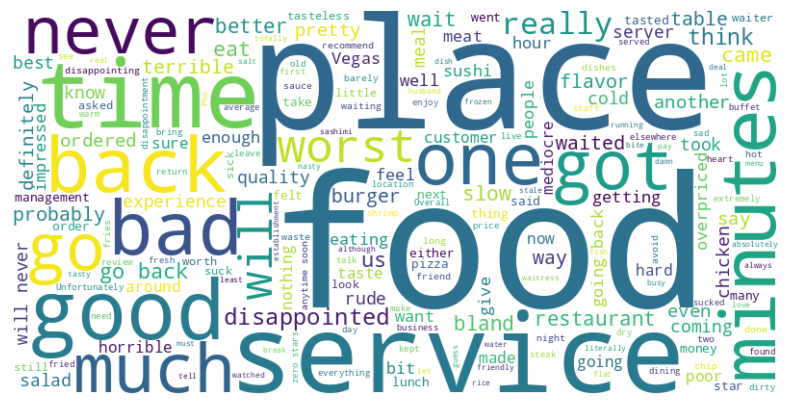

In [20]:
#negative reviews
word_cloud =df.loc[df['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
#generate a wordcloud object
wordcloud =WordCloud(width=800 ,height =400 ,background_color='white').generate(text)
#display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Split DataSet(80:20)

In [21]:
vectorizer =CountVectorizer(max_df=0.9,min_df=10)
X=vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [49]:
X_train,X_test,y_train,y_test=train_test_split(df['tokenized_Review'],df['Liked'],random_state=152,test_size=0.2)

In [50]:
X_train.head()

524                                      burgers amazing
15                           shocked signs indicate cash
745    warm feeling service felt like guest special t...
285                                   Great Pizza Salads
33     seems like good quick place grab bite familiar...
Name: tokenized_Review, dtype: object

In [51]:
train_vectorized = vectorizer.transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [111]:
X_train_array= train_vectorized.toarray()
X_test_array=test_vectorized.toarray()

# Model Training

NaiveBayes Model

In [53]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_array,y_train)

GaussianNB()

In [54]:
y_train_preds_nb=nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [57]:
pd.DataFrame({'actual_y_value':y_test,'predicted_y_values':y_test_preds_nb})

,actual_y_value,predicted_y_values
235,0,0
473,0,0
563,1,1
320,0,0
977,0,0
...,...,...
102,1,1
503,1,0
800,0,0
627,0,0


In [55]:
y_test

235    0
473    0
563    1
320    0
977    0
      ..
102    1
503    1
800    0
627    0
854    0
Name: Liked, Length: 200, dtype: int64

In [56]:
y_test_preds_nb

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [58]:
def print_metrics(actual,predicted):
  print('accuracy score is {}'.format(accuracy_score(actual,predicted)))
  print('precision_score is {}'.format(precision_score(actual,predicted)))
  print('recall_score is {}'.format(recall_score(actual,predicted)))
  print('f1_score is {}'.format(f1_score(actual,predicted)))
  print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('classification_report is {}'.format(classification_report(actual,predicted)))

In [59]:
#evaluation of training model
print_metrics(y_train , y_train_preds_nb)

accuracy score is 0.74375
precision_score is 0.9166666666666666
recall_score is 0.5432098765432098
f1_score is 0.6821705426356588
roc_auc_score is 0.7462884825754024
confusion_matrix is [[375  20]
 [185 220]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.95      0.79       395
           1       0.92      0.54      0.68       405

    accuracy                           0.74       800
   macro avg       0.79      0.75      0.73       800
weighted avg       0.79      0.74      0.73       800



In [60]:
#evalutaion of testing model
print_metrics(y_test,y_test_preds_nb)

accuracy score is 0.735
precision_score is 0.8387096774193549
recall_score is 0.5473684210526316
f1_score is 0.6624203821656051
roc_auc_score is 0.7260651629072681
confusion_matrix is [[95 10]
 [43 52]]
classification_report is               precision    recall  f1-score   support

           0       0.69      0.90      0.78       105
           1       0.84      0.55      0.66        95

    accuracy                           0.73       200
   macro avg       0.76      0.73      0.72       200
weighted avg       0.76      0.73      0.73       200



K-Nearest Neighbor Model

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8,metric ='minkowski',p=2)
knn.fit(X_train_array,y_train)

KNeighborsClassifier(n_neighbors=8)

In [105]:
y_train_preds_knn=knn.predict(X_train_array)
y_test_preds_knn=knn.predict(X_test_array)

In [108]:
pd.DataFrame({'actual_y_value':y_test,'predicted_y_values':y_test_preds_knn})

,actual_y_value,predicted_y_values
235,0,1
473,0,0
563,1,1
320,0,0
977,0,0
...,...,...
102,1,0
503,1,0
800,0,0
627,0,1


In [106]:
print_metrics(y_train , y_train_preds_knn)

accuracy score is 0.75625
precision_score is 0.8888888888888888
recall_score is 0.5925925925925926
f1_score is 0.711111111111111
roc_auc_score is 0.7583216127519925
confusion_matrix is [[365  30]
 [165 240]]
classification_report is               precision    recall  f1-score   support

           0       0.69      0.92      0.79       395
           1       0.89      0.59      0.71       405

    accuracy                           0.76       800
   macro avg       0.79      0.76      0.75       800
weighted avg       0.79      0.76      0.75       800



In [107]:
print_metrics(y_test , y_test_preds_knn)

accuracy score is 0.725
precision_score is 0.8333333333333334
recall_score is 0.5263157894736842
f1_score is 0.6451612903225806
roc_auc_score is 0.7155388471177945
confusion_matrix is [[95 10]
 [45 50]]
classification_report is               precision    recall  f1-score   support

           0       0.68      0.90      0.78       105
           1       0.83      0.53      0.65        95

    accuracy                           0.73       200
   macro avg       0.76      0.72      0.71       200
weighted avg       0.75      0.72      0.71       200



# Ploting Confusion Matrix

In [101]:
def ploting(cm):
  %matplotlib inline
  plt.figure(figsize = (10, 6))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')

In [109]:
cm_nb = confusion_matrix(y_test, y_test_preds_nb)
cm_knn = confusion_matrix(y_test, y_test_preds_knn)

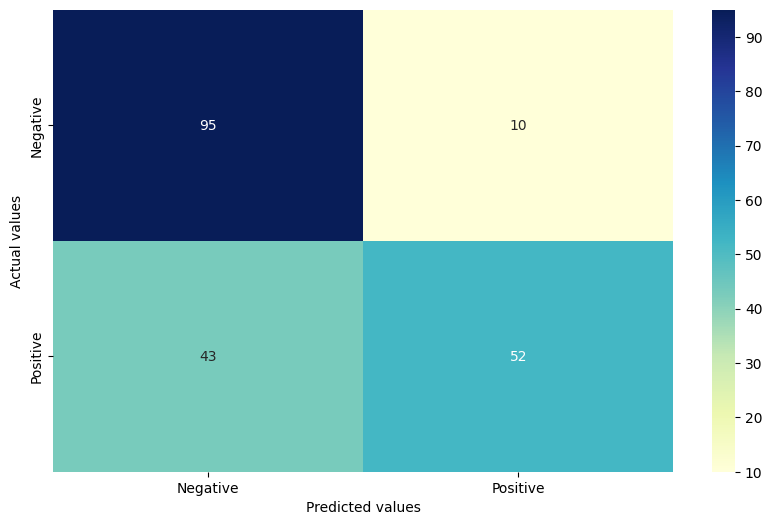

In [103]:
ploting(cm_nb)

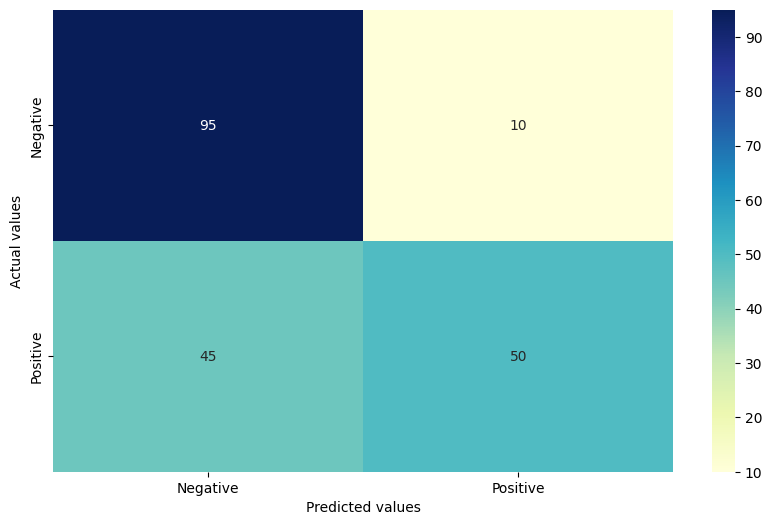

In [110]:
ploting(cm_knn)

RandomForestClassifier Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_array,y_train)

RandomForestClassifier()

In [62]:
y_train_preds_rf=rf.predict(X_train_array)
y_test_preds_rf = rf.predict(X_test_array)

In [63]:
pd.DataFrame({'actual_y_value':y_test,'predicted_y_values':y_test_preds_rf})

,actual_y_value,predicted_y_values
235,0,1
473,0,0
563,1,1
320,0,0
977,0,0
...,...,...
102,1,1
503,1,0
800,0,0
627,0,1


In [64]:
print_metrics(y_train , y_train_preds_rf)

accuracy score is 0.90625
precision_score is 0.9558011049723757
recall_score is 0.854320987654321
f1_score is 0.9022164276401564
roc_auc_score is 0.9069073292701985
confusion_matrix is [[379  16]
 [ 59 346]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.96      0.91       395
           1       0.96      0.85      0.90       405

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [65]:
print_metrics(y_test,y_test_preds_rf)

accuracy score is 0.745
precision_score is 0.7391304347826086
recall_score is 0.7157894736842105
f1_score is 0.7272727272727273
roc_auc_score is 0.7436090225563909
confusion_matrix is [[81 24]
 [27 68]]
classification_report is               precision    recall  f1-score   support

           0       0.75      0.77      0.76       105
           1       0.74      0.72      0.73        95

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

